ncdump [-c|-h] [-v ...] [[-b|-f] [c|f]] [-l len] [-n name] [-p n[,n]] [-k] [-x] [-s] [-t|-i] [-g ...] [-w] file
  [-c]             Coordinate variable data and header information
  [-h]             Header information only, no data
  [-v var1[,...]]  Data for variable(s) <var1>,... only
  [-b [c|f]]       Brief annotations for C or Fortran indices in data
  [-f [c|f]]       Full annotations for C or Fortran indices in data
  [-l len]         Line length maximum in data section (default 80)
  [-n name]        Name for netCDF (default derived from file name)
  [-p n[,n]]       Display floating-point values with less precision
  [-k]             Output kind of netCDF file
  [-s]             Output special (virtual) attributes
  [-t]             Output time data as date-time strings
  [-i]             Output time data as date-time strings with ISO-8601 'T' separator
  [-g grp1[,...]]  Data and metadata for group(s) <grp1>,... only
  [-w]             With client-side caching of variables for

/usr/local/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


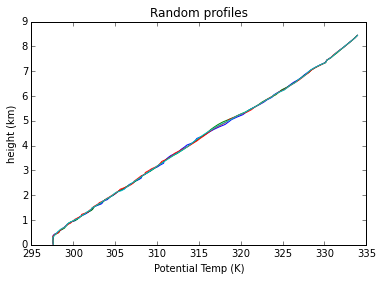

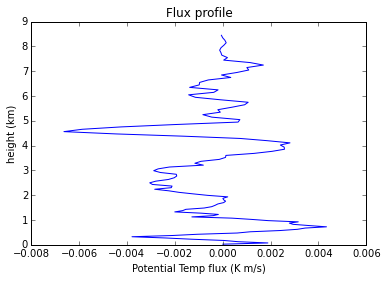

In [2]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This calculates w'theta'_bar Flux 
"""

import urllib.request
urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc", 
                           "tropical_subset.nc")
from netCDF4 import Dataset
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
#
# the variables attribute returns a dictionary of variables
#
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
pl = plt.figure(2)
ax2 = pl.add_subplot(1,1,1)
with Dataset('tropical_subset.nc','r') as nc_in:
#
#   Pull in Necessary Varriables    
#    
    ! ncdump
    print(list(nc_in.variables.keys()))
    the_temp=nc_in.variables['TABS'][...]
    the_pres=nc_in.variables['p'][...]
    the_h=nc_in.variables['z'][...]/1000
    W=nc_in.variables['W'][...]
#    
#    Remove Time
#    
    the_temp=the_temp.squeeze()
    W=W.squeeze()
#
#    Calc Theta following stull eq 1.5.1c
#
    Theta=the_temp*(1000/the_pres[:,np.newaxis,np.newaxis])**0.286
    rand_xy=[(10,20),(80,40),(25,75),(55,20)]
    for x,y in rand_xy:
        ax1.plot(Theta[:,x,y],the_h)
    ax1.set(xlabel='Potential Temp (K)',ylabel='height (km)',title = 'Random profiles')
#    
#   Calculates & plots the flux profile 
#
    Theta_Bar=Theta.mean(axis=2).mean(axis=1)
    W_Bar=W.mean(axis=2).mean(axis=1)
    Theta_Prime=Theta-Theta_Bar[:,np.newaxis,np.newaxis]
    W_Prime=W-W_Bar[:,np.newaxis,np.newaxis]
    Flux=(W_Prime*Theta_Prime)
    Flux=Flux.mean(axis=2).mean(axis=1)
    ax2.plot(Flux,the_h)    
    ax2.set(xlabel='Potential Temp flux (K m/s)',ylabel='height (km)',title = 'Flux profile')
    pl.show()
    